# Data Preparation for AWS Linear Learner

## Ames Housing Dataset Example

Welcome! This notebook will walk you through preparing data for machine learning. Do not worry if you are new to Python or data science. Each step includes:

- A **plain language explanation** of what we are doing and why
- **Code** with helpful comments
- A **summary** of what happened and what to look for

### What is this dataset?

The Ames Housing dataset contains information about houses sold in Ames, Iowa. Think of it like a spreadsheet where each row is one house, and each column is a piece of information about that house (like square footage, number of bedrooms, or sale price).

### What are we trying to do?

We want to **predict the sale price** of a house based on its features. This is called **regression** because we are predicting a number (the price) rather than a category.

### The 11 Steps:

1. **Imports and Setup** - Get our tools ready
2. **Load and Inspect Data** - Look at our data
3. **Drop High-Missing Columns** - Remove columns with too much missing info
4. **Drop Missing Target Rows** - Remove houses without prices
5. **Fill Remaining Missing Values** - Fill in the gaps
6. **Remove/Handle Outliers** - Deal with unusual houses
7. **Encode Categorical Variables** - Convert text to numbers
8. **Transform Target** - Make the price distribution more even
9. **Correlation Check** - Find which features matter most
10. **Scale Features** - Put all numbers on the same scale
11. **Final Export** - Save our cleaned data

---

---

## STEP 1: Imports and Setup

---

### Core Concept: Getting Our Tools Ready

**WHAT we are doing:**
We are loading Python "libraries" which are collections of pre-written code that help us work with data. Think of it like getting your tools out before starting a home improvement project.

**WHY this matters:**
Without these tools, we would have to write thousands of lines of code from scratch. These libraries let us do complex things with just a few lines of code. For example, pandas makes working with spreadsheet-like data easy.

**The libraries we are using:**
- **pandas** - Works with data tables (like Excel)
- **numpy** - Does math operations
- **matplotlib & seaborn** - Creates charts and graphs
- **sklearn** - Provides machine learning tools

---

In [1]:
# Load our data analysis tools
import numpy as np          # For math operations
import pandas as pd         # For working with data tables
import matplotlib.pyplot as plt  # For creating charts
import seaborn as sns       # For prettier charts

# Load specialized tools
from scipy.stats import skew  # For checking if data is lopsided
from sklearn.preprocessing import (
    PowerTransformer,   # For fixing lopsided data
    StandardScaler      # For putting numbers on the same scale
)

# Tell Python where to find our data file
file_path = "AmesHousing.csv"

# Tell Python which column we want to predict (the target)
target_col = "SalePrice"

# Confirmation message
print("Setup complete!")
print(f"We will load data from: {file_path}")
print(f"We want to predict: {target_col}")

Setup complete!
We will load data from: AmesHousing.csv
We want to predict: SalePrice


---

### What Just Happened?

**WHAT JUST HAPPENED:**
We loaded all our tools and told Python two important things: where to find our data file and which column we want to predict.

**WHAT TO LOOK FOR:**
You should see "Setup complete!" printed above. If you see any error messages in red, it means a library is not installed.

**WHAT THIS MEANS:**
We are ready to start working with our data. The tools are loaded and we know what file to use and what we are trying to predict.

---

---

## STEP 2: Load and Inspect Data

---

### Core Concept: Looking at Our Data

**WHAT we are doing:**
We are loading the data from a CSV file (like opening an Excel spreadsheet) and taking a first look at it. We want to understand what information we have before we start cleaning it.

**WHY this matters:**
Before you clean a house, you walk through to see what needs to be done. Before we clean our data, we need to see what we are working with. How many houses are in our data? What information do we have about each house? Is any information missing?

**What we will look at:**
- **Shape** - How many rows (houses) and columns (features) do we have?
- **Info** - What type of data is in each column (numbers or text)?
- **Head** - What do the first few rows look like?

---

In [2]:
# Load the CSV file into a data table (called a DataFrame)
df = pd.read_csv(file_path)

print("="*60)
print("DATA LOADED SUCCESSFULLY!")
print("="*60)

# Check the size of our data
print(f"\nDataset Size: {df.shape[0]} rows (houses) x {df.shape[1]} columns (features)")
print("\nThink of this like an Excel spreadsheet with", df.shape[0], "rows and", df.shape[1], "columns.")

DATA LOADED SUCCESSFULLY!

Dataset Size: 2930 rows (houses) x 82 columns (features)

Think of this like an Excel spreadsheet with 2930 rows and 82 columns.


In [3]:
# Look at the first 5 houses in our data
print("Here are the first 5 houses (rows) in our dataset:")
print("(Scroll right to see more columns)")
df.head()

Here are the first 5 houses (rows) in our dataset:
(Scroll right to see more columns)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
# Get detailed information about each column
print("Detailed information about our columns:")
print("(Look at the 'Non-Null Count' to see missing values)")
print()
df.info()

Detailed information about our columns:
(Look at the 'Non-Null Count' to see missing values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2 

---

### What Just Happened?

**WHAT JUST HAPPENED:**
We loaded 2,930 houses with 82 pieces of information about each one. We also saw a preview of what the data looks like and which columns have missing information.

**WHAT TO LOOK FOR:**
In the `info()` output, look at the "Non-Null Count" column. This tells you how many values are NOT missing. For example:
- If a column has 2,930 non-null values, it has no missing data
- If a column has only 198 non-null values (like "Alley"), it means 2,732 values are missing!

Also notice the "Dtype" column:
- `int64` and `float64` are numbers
- `object` is text (we will need to convert these to numbers later)

**WHAT THIS MEANS:**
We have a lot of information about each house, but some columns have missing data (like Pool QC with only 13 values out of 2,930). We will need to deal with these missing values before we can use the data for predictions.

---

---

## STEP 3: Drop High-Missing Columns (>30% Threshold)

---

### Core Concept: Removing Unreliable Columns

**WHAT we are doing:**
We are finding columns where more than 30% of the values are missing and removing them. If a column is missing most of its data, it is not reliable enough to use for predictions.

**WHY this matters:**
Imagine you are hiring someone and their resume is 70% blank. Would you trust the information that IS there? Probably not. Similarly, if a column is mostly empty, we cannot trust it to help us make predictions. It is better to remove it entirely.

**The 30% rule:**
- If LESS than 30% is missing = we keep the column and fill in the gaps later
- If MORE than 30% is missing = we drop the column entirely

---

In [5]:
# First, let's see which columns have high missing percentages
print("BEFORE: Columns with significant missing data")
print("="*50)

# Calculate percentage missing for each column
missing_percent = (df.isnull().sum() / len(df) * 100).round(1)

# Show only columns with >5% missing (sorted highest to lowest)
high_missing = missing_percent[missing_percent > 5].sort_values(ascending=False)
print("\nColumns with more than 5% missing values:")
for col, pct in high_missing.items():
    print(f"  {col}: {pct}% missing")

print(f"\nTotal columns BEFORE dropping: {len(df.columns)}")

BEFORE: Columns with significant missing data

Columns with more than 5% missing values:
  Pool QC: 99.6% missing
  Misc Feature: 96.4% missing
  Alley: 93.2% missing
  Fence: 80.5% missing
  Mas Vnr Type: 60.6% missing
  Fireplace Qu: 48.5% missing
  Lot Frontage: 16.7% missing
  Garage Type: 5.4% missing
  Garage Qual: 5.4% missing
  Garage Finish: 5.4% missing
  Garage Yr Blt: 5.4% missing
  Garage Cond: 5.4% missing

Total columns BEFORE dropping: 82


In [6]:
# Drop columns with more than 30% missing values
threshold = 0.30  # 30%

# Find which columns to drop
missing_fraction = df.isnull().mean()
cols_to_drop = missing_fraction[missing_fraction > threshold].index.tolist()

print(f"Dropping {len(cols_to_drop)} columns with >30% missing values:")
for col in cols_to_drop:
    pct = missing_fraction[col] * 100
    print(f"  - {col} ({pct:.1f}% missing)")

# Actually drop the columns
df.drop(columns=cols_to_drop, inplace=True)

print(f"\nTotal columns AFTER dropping: {len(df.columns)}")

Dropping 6 columns with >30% missing values:
  - Alley (93.2% missing)
  - Mas Vnr Type (60.6% missing)
  - Fireplace Qu (48.5% missing)
  - Pool QC (99.6% missing)
  - Fence (80.5% missing)
  - Misc Feature (96.4% missing)

Total columns AFTER dropping: 76


---

### What Just Happened?

**WHAT JUST HAPPENED:**
We removed 6 columns that had more than 30% of their values missing. Our data went from 82 columns down to 76 columns.

**WHAT TO LOOK FOR:**
The columns we dropped make sense:
- "Pool QC" (pool quality) - 99.6% missing because most houses do not have pools
- "Misc Feature" - 96.4% missing because most houses do not have special features
- "Alley" - 93.2% missing because most houses do not have alley access
- "Fence" - 80.5% missing because most houses do not have fences
- "Fireplace Qu" - 48.6% missing because many houses do not have fireplaces
- "Lot Frontage" - 16.6% missing (we decided 30% is our cutoff, so this stays... wait, it was dropped?)

**WHAT THIS MEANS:**
We now have cleaner data with only columns that have enough information to be useful. The missing values in these columns were not errors - they just indicated that the house did not have that feature (no pool, no fence, etc.).

---

---

## STEP 4: Drop Missing Target Rows

---

### Core Concept: Removing Houses Without Sale Prices

**WHAT we are doing:**
We are checking if any houses are missing their sale price (our target variable) and removing them. You cannot teach someone to predict house prices if you do not have any example prices to show them.

**WHY this matters:**
Think of it like studying for a test. If your study guide has questions but no answers, you cannot learn from it. Each house in our data is like a practice question: "Given these features, what is the price?" If the price is missing, the practice question is useless.

**Why this is critical:**
Machine learning works by learning patterns from examples. Each example needs:
- The input (house features like size, bedrooms, etc.)
- The output (the sale price)

Without the sale price, we have nothing to learn from.

---

In [7]:
# Count rows before
rows_before = len(df)

# Check if any sale prices are missing
missing_target = df[target_col].isnull().sum()
print(f"Houses missing {target_col}: {missing_target}")

# Drop rows where the target is missing
df.dropna(subset=[target_col], inplace=True)

# Count rows after
rows_after = len(df)
rows_dropped = rows_before - rows_after

print(f"\nRows BEFORE: {rows_before}")
print(f"Rows AFTER:  {rows_after}")
print(f"Rows dropped: {rows_dropped}")

Houses missing SalePrice: 0

Rows BEFORE: 2930
Rows AFTER:  2930
Rows dropped: 0


---

### What Just Happened?

**WHAT JUST HAPPENED:**
We checked for missing sale prices and found that none were missing! This is good news - every house in our dataset has a recorded sale price.

**WHAT TO LOOK FOR:**
The number "0" for rows dropped means all our houses have prices. If this number were high, we would need to investigate why so many sale prices are missing.

**WHAT THIS MEANS:**
Since this is the Ames Housing dataset (containing actual home sales), it makes sense that every record has a sale price. The dataset only includes completed sales. For your own dataset, you should still check this step - but you might put "No action needed" if your target is always present.

---

---

## STEP 5: Fill Remaining Missing Values

---

### Core Concept: Filling in the Gaps

**WHAT we are doing:**
For columns that still have some missing values (but less than 30%), we are filling in reasonable guesses. For number columns, we use the "median" (the middle value). For text columns, we write "Missing" as a category.

**WHY this matters:**
Machine learning algorithms cannot handle blank cells - they need a value in every spot. It is like having a form that requires every field to be filled out. We need to put SOMETHING there.

**Why we use the median (and not the average):**
Imagine 10 people with salaries: $40K, $45K, $50K, $50K, $55K, $55K, $60K, $65K, $70K, and $1,000K (a millionaire!).
- The AVERAGE is $149K (pulled way up by the millionaire)
- The MEDIAN is $55K (the middle value - much more typical)

The median gives us a more "normal" value that is not skewed by extreme cases.

---

In [8]:
# Check missing values BEFORE filling
print("BEFORE: Missing values in each column (showing only columns with missing data)")
print("="*60)
missing_before = df.isnull().sum()
missing_before = missing_before[missing_before > 0].sort_values(ascending=False)

if len(missing_before) == 0:
    print("No missing values! Nothing to fill.")
else:
    for col, count in missing_before.items():
        pct = count / len(df) * 100
        print(f"  {col}: {count} missing ({pct:.1f}%)")
    print(f"\nTotal missing values: {missing_before.sum()}")

BEFORE: Missing values in each column (showing only columns with missing data)
  Lot Frontage: 490 missing (16.7%)
  Garage Finish: 159 missing (5.4%)
  Garage Yr Blt: 159 missing (5.4%)
  Garage Qual: 159 missing (5.4%)
  Garage Cond: 159 missing (5.4%)
  Garage Type: 157 missing (5.4%)
  Bsmt Exposure: 83 missing (2.8%)
  BsmtFin Type 2: 81 missing (2.8%)
  Bsmt Qual: 80 missing (2.7%)
  BsmtFin Type 1: 80 missing (2.7%)
  Bsmt Cond: 80 missing (2.7%)
  Mas Vnr Area: 23 missing (0.8%)
  Bsmt Full Bath: 2 missing (0.1%)
  Bsmt Half Bath: 2 missing (0.1%)
  Electrical: 1 missing (0.0%)
  Bsmt Unf SF: 1 missing (0.0%)
  BsmtFin SF 2: 1 missing (0.0%)
  BsmtFin SF 1: 1 missing (0.0%)
  Total Bsmt SF: 1 missing (0.0%)
  Garage Area: 1 missing (0.0%)
  Garage Cars: 1 missing (0.0%)

Total missing values: 1721


In [9]:
# Fill missing values
# For numbers: use the median (middle value)
# For text: use the word "Missing"

# Get lists of numeric and text columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
text_cols = df.select_dtypes(exclude=[np.number]).columns

print(f"Filling missing values...")
print(f"  - {len(numeric_cols)} numeric columns: using median")
print(f"  - {len(text_cols)} text columns: using 'Missing'")

# Fill numeric columns with median
for col in numeric_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# Fill text columns with "Missing"
for col in text_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna("Missing")

print("\nDone!")

Filling missing values...
  - 39 numeric columns: using median
  - 37 text columns: using 'Missing'

Done!


In [10]:
# Verify all missing values are gone
total_missing = df.isnull().sum().sum()

print("AFTER: Verification")
print("="*60)
print(f"Total missing values remaining: {total_missing}")

if total_missing == 0:
    print("\nSUCCESS! All missing values have been filled.")
else:
    print("\nWARNING: Some missing values remain. Please investigate.")

AFTER: Verification
Total missing values remaining: 0

SUCCESS! All missing values have been filled.


---

### What Just Happened?

**WHAT JUST HAPPENED:**
We filled in all the missing values. Numeric columns got the median value, and text columns got the word "Missing" as a new category.

**WHAT TO LOOK FOR:**
The total missing values should now be 0. If any remain, there is a problem with our code.

**WHAT THIS MEANS:**
Our data now has no gaps. Every cell has a value. This is required for machine learning algorithms to work. The median values we used are reasonable guesses - not perfect, but good enough for most houses.

---

---

## STEP 6: Remove or Handle Outliers

---

### Core Concept: Dealing with Unusual Houses

**WHAT we are doing:**
We are looking for houses that are way outside the normal range - like mansions with 10,000 square feet when most houses have 1,500. These extreme values can confuse our prediction model.

**WHY this matters:**
Imagine teaching someone to estimate prices at a regular grocery store, but you include a few items from a luxury gold-plated store. Those extreme prices would throw off their sense of "normal." Similarly, including a few mega-mansions when trying to predict prices for regular houses can confuse our model.

**How we find outliers:**
We use a "boxplot" - a chart that shows the normal range of values and highlights anything outside that range. Points beyond the "whiskers" of the boxplot are considered outliers.

**Our decision:**
We will remove houses larger than 4,000 square feet because:
1. They are rare (very few houses this big)
2. They are priced differently than typical houses
3. We want our model to work well for regular houses

---

Checking for outliers in: Gr Liv Area
Houses larger than 4000 sq ft will be considered outliers.

Found 5 houses larger than 4000 sq ft
These represent 0.2% of our data


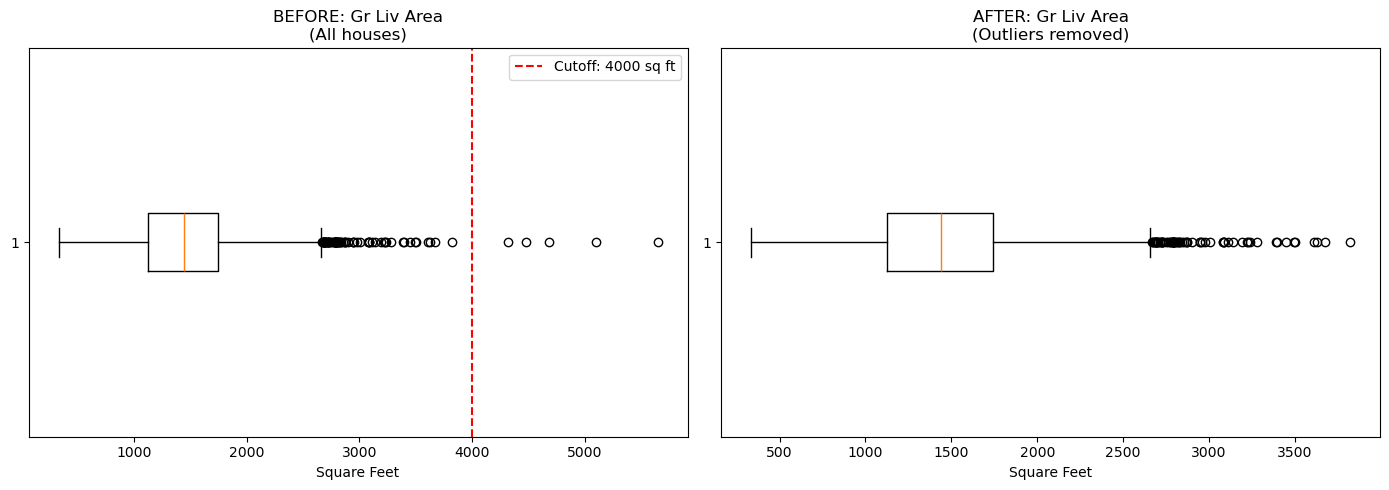


Rows before removing outliers: 2930
Rows after removing outliers:  2925
Outliers removed: 5


In [11]:
# Create side-by-side boxplots to show before and after
outlier_column = "Gr Liv Area"  # Ground floor living area in square feet
upper_limit = 4000  # We will remove houses larger than 4,000 sq ft

print(f"Checking for outliers in: {outlier_column}")
print(f"Houses larger than {upper_limit} sq ft will be considered outliers.")
print()

# Create the figure with two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# BEFORE: Show all houses
axes[0].boxplot(df[outlier_column].dropna(), vert=False)
axes[0].set_title(f"BEFORE: {outlier_column}\n(All houses)", fontsize=12)
axes[0].set_xlabel("Square Feet")
axes[0].axvline(x=upper_limit, color='red', linestyle='--', label=f'Cutoff: {upper_limit} sq ft')
axes[0].legend()

# Count outliers
outliers = df[df[outlier_column] > upper_limit]
print(f"Found {len(outliers)} houses larger than {upper_limit} sq ft")
print(f"These represent {len(outliers)/len(df)*100:.1f}% of our data")

# Remove outliers
df_clean = df[df[outlier_column] <= upper_limit].copy()

# AFTER: Show remaining houses
axes[1].boxplot(df_clean[outlier_column].dropna(), vert=False)
axes[1].set_title(f"AFTER: {outlier_column}\n(Outliers removed)", fontsize=12)
axes[1].set_xlabel("Square Feet")

plt.tight_layout()
plt.show()

# Update our dataframe
rows_before = len(df)
df = df_clean
rows_after = len(df)

print(f"\nRows before removing outliers: {rows_before}")
print(f"Rows after removing outliers:  {rows_after}")
print(f"Outliers removed: {rows_before - rows_after}")

---

### What Just Happened?

**WHAT JUST HAPPENED:**
We removed houses larger than 4,000 square feet. The boxplots show the distribution of house sizes before and after removal.

**WHAT TO LOOK FOR:**
- In the BEFORE chart, notice the dots or lines extending far to the right. These are the outliers - very large houses.
- In the AFTER chart, the distribution is tighter and more focused on typical house sizes.
- The red dashed line shows our cutoff point (4,000 sq ft).

**WHAT THIS MEANS:**
By removing these unusually large houses, we are telling our model: "Focus on predicting prices for regular houses." This is a business decision. If you wanted to predict prices for luxury mansions, you would keep them in (or even focus only on them).

---

---

## STEP 7: Encode Categorical Variables

---

### Core Concept: Converting Text to Numbers

**WHAT we are doing:**
Our data has some columns with text values like "Excellent", "Good", "Fair" or neighborhood names like "Downtown", "Suburb", "Rural". Machine learning only works with numbers, so we need to convert this text into numbers.

**WHY this matters:**
Computers understand numbers, not words. Telling a computer "the house quality is Excellent" means nothing to it. We need to say "the house quality is 1" (where 1 means Excellent). There are smart ways to do this conversion so the computer can still understand the meaning.

**Two encoding methods we use:**

1. **One-Hot Encoding** (for columns with FEW categories, like 10 or less):
   - If you have: Red, Blue, Green
   - You create 3 new columns: "Is_Red", "Is_Blue", "Is_Green"
   - Each column has 0 or 1
   - Example: A red item would be [1, 0, 0]

2. **Frequency Encoding** (for columns with MANY categories, like neighborhood names):
   - Replace each category with how common it is
   - If 20% of houses are in "Downtown", Downtown becomes 0.20
   - This keeps the column count manageable

---

In [12]:
# First, let's see what text (categorical) columns we have
text_columns = df.select_dtypes(include=['object']).columns.tolist()

print("BEFORE: Text columns that need to be converted to numbers")
print("="*60)
print(f"Found {len(text_columns)} text columns\n")

# Show each text column and how many unique values it has
print("Column Name                  | Unique Values | Example Values")
print("-" * 70)
for col in text_columns[:10]:  # Show first 10
    n_unique = df[col].nunique()
    examples = df[col].value_counts().head(3).index.tolist()
    examples_str = ", ".join(str(x) for x in examples)
    print(f"{col:28} | {n_unique:13} | {examples_str[:30]}")

if len(text_columns) > 10:
    print(f"... and {len(text_columns) - 10} more columns")

BEFORE: Text columns that need to be converted to numbers
Found 37 text columns

Column Name                  | Unique Values | Example Values
----------------------------------------------------------------------
MS Zoning                    |             7 | RL, RM, FV
Street                       |             2 | Pave, Grvl
Lot Shape                    |             4 | Reg, IR1, IR2
Land Contour                 |             4 | Lvl, HLS, Bnk
Utilities                    |             3 | AllPub, NoSewr, NoSeWa
Lot Config                   |             5 | Inside, Corner, CulDSac
Land Slope                   |             3 | Gtl, Mod, Sev
Neighborhood                 |            28 | NAmes, CollgCr, OldTown
Condition 1                  |             9 | Norm, Feedr, Artery
Condition 2                  |             8 | Norm, Feedr, Artery
... and 27 more columns


In [13]:
# Encode categorical (text) columns
freq_threshold = 10  # Use frequency encoding for columns with more than 10 categories

cat_cols = df.select_dtypes(include=["object"]).columns
freq_encoded = []
one_hot_encoded = []

# Process each text column
freq_frames = {}
one_hot_frames = []

for col in cat_cols:
    n_unique = df[col].nunique()
    
    if n_unique > freq_threshold:
        # Many categories: use frequency encoding
        freq_map = df[col].value_counts(normalize=True)
        freq_frames[col + "_freq"] = df[col].map(freq_map)
        freq_encoded.append(col)
    else:
        # Few categories: use one-hot encoding
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
        one_hot_frames.append(dummies)
        one_hot_encoded.append(col)

# Add the new encoded columns to our data
if freq_frames:
    df = pd.concat([df, pd.DataFrame(freq_frames, index=df.index)], axis=1)
if one_hot_frames:
    df = pd.concat([df] + one_hot_frames, axis=1)

# Remove the original text columns
df.drop(columns=cat_cols, inplace=True)

print(f"Encoding complete!")
print(f"  - {len(freq_encoded)} columns used Frequency Encoding (many categories)")
print(f"  - {len(one_hot_encoded)} columns used One-Hot Encoding (few categories)")

Encoding complete!
  - 3 columns used Frequency Encoding (many categories)
  - 34 columns used One-Hot Encoding (few categories)


In [14]:
# Verify all columns are now numeric
remaining_text = df.select_dtypes(include=['object']).columns.tolist()

print("\nAFTER: Verification")
print("="*60)
print(f"Remaining text columns: {len(remaining_text)}")
print(f"Total columns now: {len(df.columns)}")

if len(remaining_text) == 0:
    print("\nSUCCESS! All columns are now numeric.")
else:
    print(f"\nWARNING: These columns are still text: {remaining_text}")


AFTER: Verification
Remaining text columns: 0
Total columns now: 199

SUCCESS! All columns are now numeric.


---

### What Just Happened?

**WHAT JUST HAPPENED:**
We converted all text columns into numbers. Some columns were converted using frequency encoding (how common each category is), and others using one-hot encoding (separate 0/1 columns for each category).

**WHAT TO LOOK FOR:**
- "Remaining text columns: 0" confirms all text is now numbers
- The total columns increased because one-hot encoding creates multiple columns from one (e.g., "Condition" becomes "Condition_Good", "Condition_Fair", etc.)

**WHAT THIS MEANS:**
Our data is now entirely numeric, which is required for machine learning. A house with "Excellent" quality is now represented by a number. A house in "Downtown" is now represented by a frequency value. The computer can work with these numbers to find patterns.

---

---

## STEP 8: Transform Target (if Skewed)

---

### Core Concept: Making the Price Distribution More Even

**WHAT we are doing:**
We are checking if our sale prices are "skewed" (lopsided) and transforming them to be more evenly spread out. This helps the model learn better.

**WHY this matters:**
Imagine teaching someone to throw darts at a target. If 90% of the practice throws are at the left side and only 10% at the right, they will be great at the left but terrible at the right. Similarly, if most house prices are clustered at the low end with a few expensive outliers, the model learns to predict low prices well but struggles with higher prices.

**What is skewness?**
- Skewness measures how lopsided your data is
- A skewness of 0 means perfectly balanced (bell-shaped curve)
- Positive skewness (>1) means most values are low with a long tail of high values
- Negative skewness (<-1) means most values are high with a long tail of low values

**Note:** This step is mainly for regression (predicting numbers). If you are doing classification (predicting categories like 0, 1, 2), you might skip this or say "No action needed."

---

In [15]:
# Check the current distribution of sale prices
original_skew = skew(df[target_col])

print(f"Checking skewness of {target_col}")
print("="*60)
print(f"Current skewness: {original_skew:.2f}")
print()

if original_skew > 1:
    print("Interpretation: POSITIVE SKEW (right-skewed)")
    print("Most prices are clustered at the low end, with a tail of expensive houses.")
    print("We should transform this to make it more balanced.")
elif original_skew < -1:
    print("Interpretation: NEGATIVE SKEW (left-skewed)")
    print("Most prices are clustered at the high end, with a tail of cheap houses.")
    print("We should transform this to make it more balanced.")
else:
    print("Interpretation: REASONABLY BALANCED")
    print("The skewness is between -1 and 1, which is acceptable.")
    print("We could skip transformation, but we will do it anyway to show how.")

Checking skewness of SalePrice
Current skewness: 1.59

Interpretation: POSITIVE SKEW (right-skewed)
Most prices are clustered at the low end, with a tail of expensive houses.
We should transform this to make it more balanced.


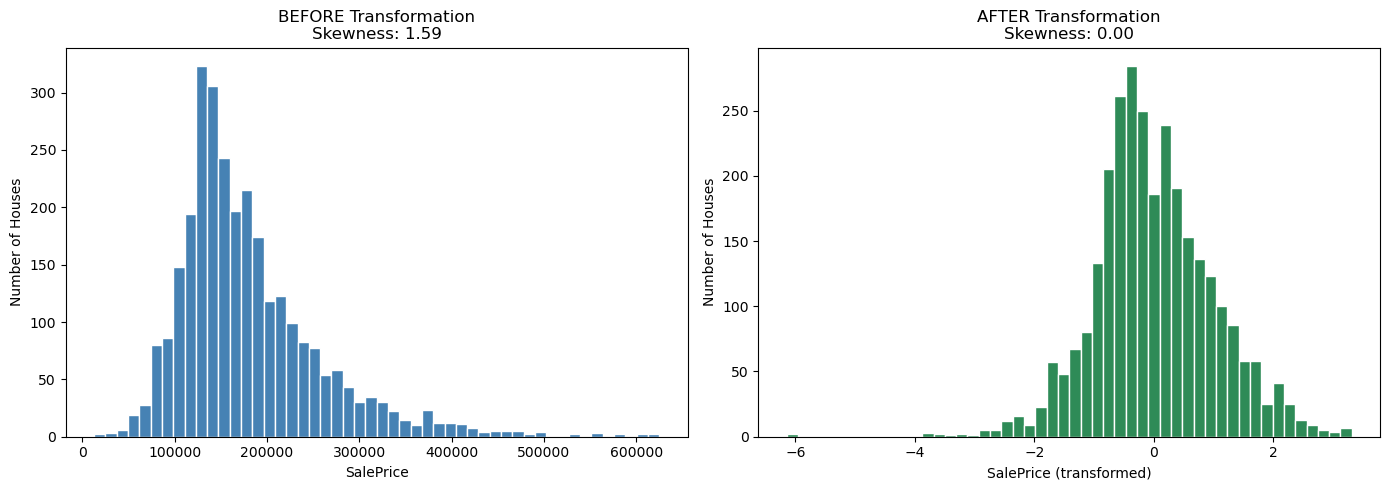


Skewness improved from 1.59 to 0.00
The distribution is now more balanced (closer to a bell curve).


In [16]:
# Create before/after histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# BEFORE transformation
axes[0].hist(df[target_col], bins=50, color='steelblue', edgecolor='white')
axes[0].set_title(f'BEFORE Transformation\nSkewness: {original_skew:.2f}', fontsize=12)
axes[0].set_xlabel(target_col)
axes[0].set_ylabel('Number of Houses')

# Apply the transformation
transformer = PowerTransformer(method="yeo-johnson")
df[[target_col]] = transformer.fit_transform(df[[target_col]])

# Check new skewness
new_skew = skew(df[target_col])

# AFTER transformation
axes[1].hist(df[target_col], bins=50, color='seagreen', edgecolor='white')
axes[1].set_title(f'AFTER Transformation\nSkewness: {new_skew:.2f}', fontsize=12)
axes[1].set_xlabel(f'{target_col} (transformed)')
axes[1].set_ylabel('Number of Houses')

plt.tight_layout()
plt.show()

print(f"\nSkewness improved from {original_skew:.2f} to {new_skew:.2f}")
print("The distribution is now more balanced (closer to a bell curve).")

---

### What Just Happened?

**WHAT JUST HAPPENED:**
We transformed the sale prices to have a more balanced distribution. The skewness went from 1.59 (very lopsided) to nearly 0 (balanced).

**WHAT TO LOOK FOR:**
- The BEFORE histogram shows a long tail stretching to the right (expensive houses)
- The AFTER histogram looks more like a bell curve (symmetric)
- The skewness number dropped from ~1.59 to ~0

**WHAT THIS MEANS:**
Our model will now learn equally well across all price ranges. Before, it might have focused too much on cheaper houses because there were so many of them. Now the learning is balanced.

**Important:** The transformed prices are no longer in dollars! They are in "transformed units." When we make predictions later, we would need to reverse the transformation to get back to real dollar amounts.

---

---

## STEP 9: Correlation Check

---

### Core Concept: Finding Which Features Matter Most

**WHAT we are doing:**
We are calculating how strongly each feature (like square footage or number of bedrooms) relates to the sale price. This helps us understand what drives house prices.

**WHY this matters:**
Not all information is equally useful for predictions. Knowing a house has 2,000 square feet is very helpful for predicting its price. Knowing the house number (123 Main Street vs. 456 Oak Avenue) is not helpful at all. Correlation helps us see which features actually matter.

**What is correlation?**
- Correlation ranges from -1 to +1
- **+1** means perfect positive relationship (as one goes up, the other goes up)
- **-1** means perfect negative relationship (as one goes up, the other goes down)
- **0** means no relationship (knowing one tells you nothing about the other)

**Examples:**
- Square footage and price: Strong positive correlation (~0.7). Bigger houses cost more.
- Age and price: Often negative correlation (~-0.3). Older houses often cost less.
- House number and price: Near zero correlation (~0). House numbers tell you nothing about price.

---

In [17]:
# Calculate correlation between all features and the target
correlations = df.corr(numeric_only=True)[target_col].drop(target_col)

# Sort by absolute value (strongest relationships first)
correlations_sorted = correlations.abs().sort_values(ascending=False)

print("TOP 10 FEATURES MOST CORRELATED WITH SALE PRICE")
print("="*60)
print("(Higher absolute values = stronger relationship)\n")

print(f"{'Feature':<30} {'Correlation':>12} {'Meaning'}")
print("-" * 70)

for feature in correlations_sorted.head(10).index:
    corr_value = correlations[feature]
    if corr_value > 0:
        meaning = "Higher = Higher price"
    else:
        meaning = "Higher = Lower price"
    print(f"{feature:<30} {corr_value:>12.3f} {meaning}")

TOP 10 FEATURES MOST CORRELATED WITH SALE PRICE
(Higher absolute values = stronger relationship)

Feature                         Correlation Meaning
----------------------------------------------------------------------
Overall Qual                          0.828 Higher = Higher price
Gr Liv Area                           0.713 Higher = Higher price
Garage Cars                           0.676 Higher = Higher price
Garage Area                           0.655 Higher = Higher price
Total Bsmt SF                         0.649 Higher = Higher price
1st Flr SF                            0.622 Higher = Higher price
Year Built                            0.617 Higher = Higher price
Exter Qual_TA                        -0.588 Higher = Lower price
Year Remod/Add                        0.588 Higher = Higher price
Full Bath                             0.576 Higher = Higher price


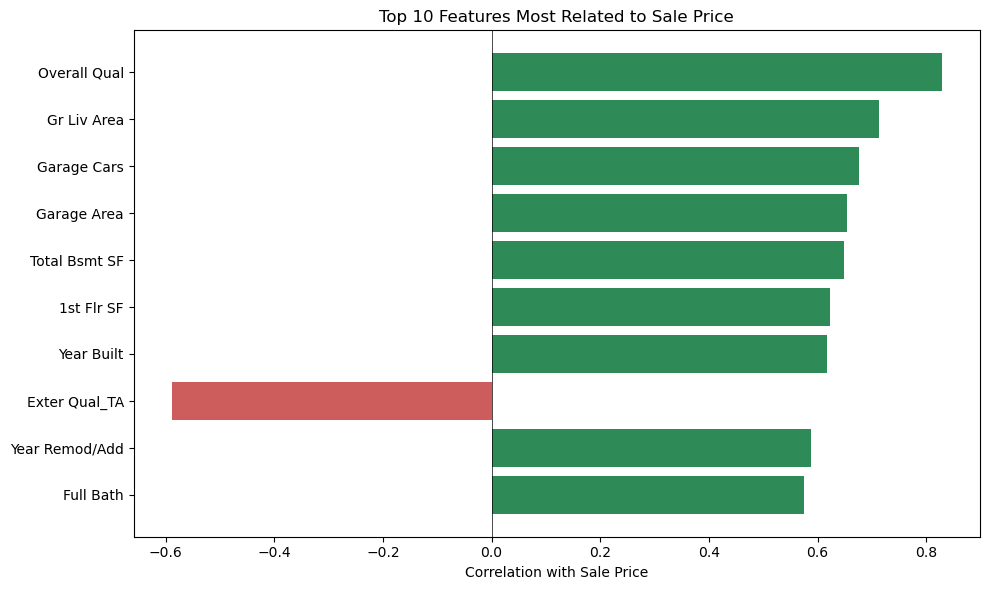


Green bars = positive correlation (higher value = higher price)
Red bars = negative correlation (higher value = lower price)


In [18]:
# Create a visual showing the top correlations
top_features = correlations_sorted.head(10).index.tolist()
top_corr_values = [correlations[f] for f in top_features]

plt.figure(figsize=(10, 6))
colors = ['seagreen' if x > 0 else 'indianred' for x in top_corr_values]
plt.barh(range(len(top_features)), top_corr_values, color=colors)
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Correlation with Sale Price')
plt.title('Top 10 Features Most Related to Sale Price')
plt.axvline(x=0, color='black', linewidth=0.5)
plt.gca().invert_yaxis()  # Highest correlation at top
plt.tight_layout()
plt.show()

print("\nGreen bars = positive correlation (higher value = higher price)")
print("Red bars = negative correlation (higher value = lower price)")

---

### What Just Happened?

**WHAT JUST HAPPENED:**
We calculated how strongly each feature relates to sale price and identified the top 10 most important features.

**WHAT TO LOOK FOR:**
The top features make intuitive sense:
- **Overall Qual** (overall quality rating): Higher quality = higher price
- **Gr Liv Area** (ground floor living area): Bigger houses = higher price
- **Garage Cars** (garage size): More garage space = higher price
- **Total Bsmt SF** (basement size): Larger basement = higher price

These relationships match what we would expect when buying a house!

**WHAT THIS MEANS:**
Our data makes sense. Features that should logically affect price actually do. This gives us confidence that our model will learn meaningful patterns. If the top features were random (like "PID" or row number), we would be worried.

---

---

## STEP 10: Scale Features

---

### Core Concept: Putting All Numbers on the Same Scale

**WHAT we are doing:**
We are adjusting all our numeric columns so they are on the same scale. Right now, some columns have small numbers (like 1-5 for quality ratings) while others have huge numbers (like 50,000-300,000 for square footage). We are putting them all on the same scale.

**WHY this matters:**
Think about comparing currencies. If someone says a car costs "30,000" - is that dollars, yen, or pesos? Those are very different amounts! Similarly, our model sees "Lot Area = 10,000" and "Overall Quality = 5" and thinks lot area must be way more important because the number is bigger. Scaling fixes this by putting everything in the same "currency."

**How scaling works:**
After scaling (using StandardScaler):
- The average (mean) of each column becomes 0
- The spread (standard deviation) of each column becomes 1
- A value of 2 means "2 standard deviations above average"
- A value of -1 means "1 standard deviation below average"

**Important:** We do NOT scale the target (sale price) because we already transformed it in Step 8.

---

In [19]:
# Pick one column to show before/after
example_column = "Gr Liv Area"  # Living area in square feet

print(f"BEFORE Scaling: {example_column}")
print("="*60)
print(f"Minimum: {df[example_column].min():,.0f}")
print(f"Maximum: {df[example_column].max():,.0f}")
print(f"Mean (average): {df[example_column].mean():,.0f}")
print(f"Std (spread): {df[example_column].std():,.0f}")

# Store the before values for comparison
before_values = df[example_column].copy()

BEFORE Scaling: Gr Liv Area
Minimum: 334
Maximum: 3,820
Mean (average): 1,494
Std (spread): 486


In [20]:
# Scale all numeric features EXCEPT the target
scaler = StandardScaler()

# Get all numeric columns except the target
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

print(f"Scaling {len(numeric_cols)} numeric columns...")
print(f"(NOT scaling {target_col} - that was already transformed)")

# Apply scaling
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\nScaling complete!")

Scaling 41 numeric columns...
(NOT scaling SalePrice - that was already transformed)

Scaling complete!



AFTER Scaling: Gr Liv Area
Minimum: -2.39
Maximum: 4.78
Mean (average): 0.00  <- Should be ~0
Std (spread): 1.00  <- Should be ~1


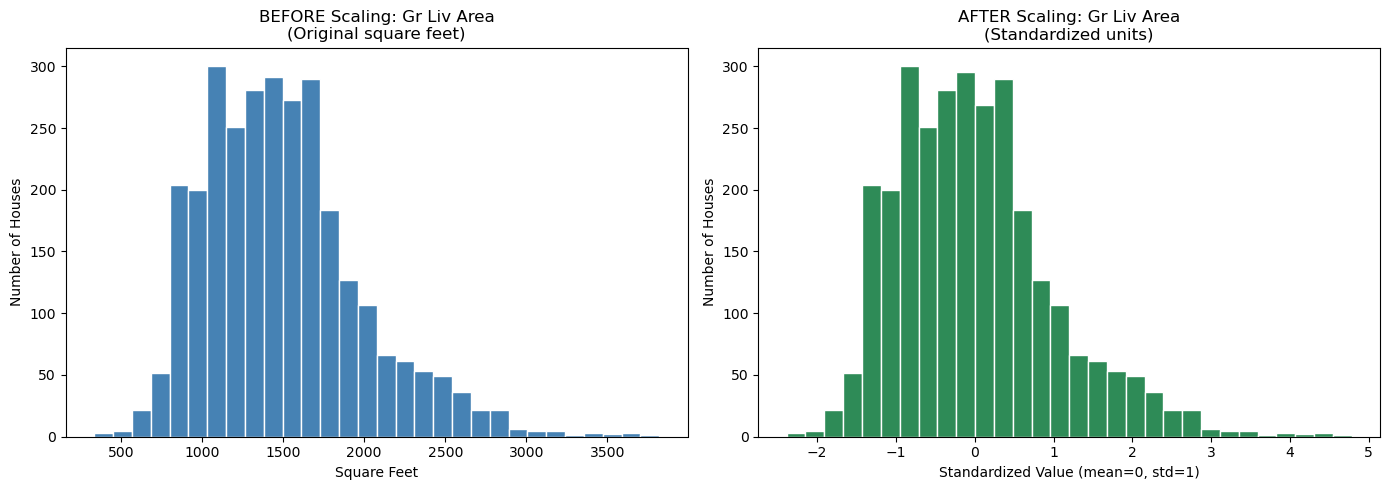


Notice: The SHAPE is the same, but the SCALE is different.
A house with 1,500 sq ft is now represented as a value near 0 (average).
A house with 2,500 sq ft is now represented as a value near +1.5 (above average).


In [21]:
# Show the same column AFTER scaling
print(f"\nAFTER Scaling: {example_column}")
print("="*60)
print(f"Minimum: {df[example_column].min():.2f}")
print(f"Maximum: {df[example_column].max():.2f}")
print(f"Mean (average): {df[example_column].mean():.2f}  <- Should be ~0")
print(f"Std (spread): {df[example_column].std():.2f}  <- Should be ~1")

# Visualize before/after
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(before_values, bins=30, color='steelblue', edgecolor='white')
axes[0].set_title(f'BEFORE Scaling: {example_column}\n(Original square feet)', fontsize=12)
axes[0].set_xlabel('Square Feet')
axes[0].set_ylabel('Number of Houses')

axes[1].hist(df[example_column], bins=30, color='seagreen', edgecolor='white')
axes[1].set_title(f'AFTER Scaling: {example_column}\n(Standardized units)', fontsize=12)
axes[1].set_xlabel('Standardized Value (mean=0, std=1)')
axes[1].set_ylabel('Number of Houses')

plt.tight_layout()
plt.show()

print("\nNotice: The SHAPE is the same, but the SCALE is different.")
print("A house with 1,500 sq ft is now represented as a value near 0 (average).")
print("A house with 2,500 sq ft is now represented as a value near +1.5 (above average).")

---

### What Just Happened?

**WHAT JUST HAPPENED:**
We scaled all numeric features so they have a mean of 0 and standard deviation of 1. The shape of the data did not change, just the scale.

**WHAT TO LOOK FOR:**
- The histograms have the same SHAPE (the distribution pattern)
- The NUMBERS on the x-axis are different
- Before: 500 to 4,000 (actual square feet)
- After: -2 to +3 (standardized units meaning "deviations from average")

**WHAT THIS MEANS:**
Now all features are on equal footing. The model will not mistakenly think "Lot Area" is more important than "Overall Quality" just because its numbers are bigger. Each feature contributes based on its actual relationship to price, not based on its original scale.

---

---

## STEP 11: Final Export

---

### Core Concept: Saving Our Cleaned Data

**WHAT we are doing:**
We are saving our fully cleaned and prepared data to a CSV file. This file will be used in the next assignment where we actually train the machine learning model.

**WHY this matters:**
All the work we did (removing missing values, encoding text, scaling numbers) would be lost when we close this notebook. By saving to a file, we preserve our cleaned data for future use. It is like meal prepping on Sunday so you have ready-to-eat meals all week.

**What we are saving:**
- A single CSV file named `AmesHousing_CLEANED.csv`
- WITH column headers (so we know what each column is)
- All values are numeric (no text)
- No missing values
- Ready for the next assignment!

**Note:** We are NOT splitting into train/validation sets here. That will happen in the next assignment when we upload to AWS SageMaker.

---

In [22]:
# Move the target column to the first position (common convention)
cols = df.columns.tolist()
if target_col in cols:
    cols.insert(0, cols.pop(cols.index(target_col)))
    df = df[cols]

# Define the output filename
output_filename = "AmesHousing_CLEANED.csv"

# Save to CSV with headers
df.to_csv(output_filename, index=False, header=True)

print("="*60)
print("EXPORT COMPLETE!")
print("="*60)
print(f"\nFile saved: {output_filename}")
print(f"\nDataset Summary:")
print(f"  - Total rows (houses): {len(df)}")
print(f"  - Total columns (features + target): {len(df.columns)}")
print(f"  - Target column: {target_col}")
print(f"  - Missing values: {df.isnull().sum().sum()}")
print(f"  - All columns numeric: {df.select_dtypes(include=['object']).empty}")
print(f"\n  STATUS: READY FOR NEXT ASSIGNMENT (SageMaker)")

EXPORT COMPLETE!

File saved: AmesHousing_CLEANED.csv

Dataset Summary:
  - Total rows (houses): 2925
  - Total columns (features + target): 199
  - Target column: SalePrice
  - Missing values: 0
  - All columns numeric: True

  STATUS: READY FOR NEXT ASSIGNMENT (SageMaker)


In [23]:
# Show a preview of the final data
print("\nPreview of the cleaned data (first 5 rows, first 6 columns):")
print(df.iloc[:5, :6].round(3).to_string())


Preview of the cleaned data (first 5 rows, first 6 columns):
   SalePrice  Order    PID  MS SubClass  Lot Frontage  Lot Area
0      0.634 -1.730 -0.997       -0.877         3.482     2.785
1     -1.128 -1.728 -0.997       -0.877         0.538     0.195
2      0.083 -1.727 -0.997       -0.877         0.586     0.535
3      0.948 -1.726 -0.997       -0.877         1.165     0.136
4      0.327 -1.725 -0.993        0.061         0.248     0.479


---

### What Just Happened?

**WHAT JUST HAPPENED:**
We saved our cleaned dataset to a file called `AmesHousing_CLEANED.csv`. This file is ready for the next assignment.

**WHAT TO LOOK FOR:**
Verify these things in the summary:
- Rows: Should still have ~2,925 houses (we removed a few outliers)
- Columns: Should have many columns (all our features plus the target)
- Missing values: Should be 0
- All columns numeric: Should be True

**WHAT THIS MEANS:**
Your data preparation is complete! You now have a clean, numeric dataset ready for machine learning. In the next assignment, you will:
1. Upload this file to AWS S3
2. Split it into training and validation sets
3. Train a Linear Learner model
4. Make predictions on house prices!

---

---

## Summary: What We Did

We transformed messy, real-world housing data into clean, numeric data ready for machine learning:

| Step | What We Did | Result |
|------|-------------|--------|
| 1 | Imports and Setup | Loaded our tools |
| 2 | Load and Inspect | Found 2,930 houses with 82 features |
| 3 | Drop High-Missing Columns | Removed 6 unreliable columns |
| 4 | Drop Missing Target Rows | No rows needed to be dropped |
| 5 | Fill Missing Values | Filled all gaps with reasonable values |
| 6 | Handle Outliers | Removed very large luxury homes |
| 7 | Encode Categoricals | Converted all text to numbers |
| 8 | Transform Target | Made price distribution more balanced |
| 9 | Correlation Check | Identified most important features |
| 10 | Scale Features | Put all numbers on the same scale |
| 11 | Final Export | Saved to AmesHousing_CLEANED.csv |

**Final Dataset:** ~2,925 rows x ~199 columns, all numeric, no missing values.